This script calculates the Pearson correlation coefficients between brain and liver tissues after PCA (Principal Component Analysis) for each sample.

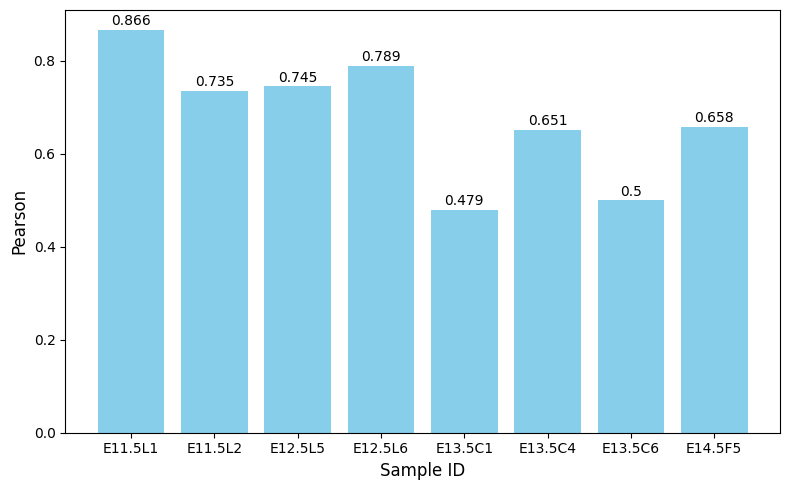

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['pdf.fonttype'] = 42

tissue_list = ['Liver', 'Brain']
sample_list = ['E11.5L1', 'E11.5L2', 'E12.5L5', 'E12.5L6', 'E13.5C1', 'E13.5C4', 'E13.5C6', 'E14.5F5']

dir_path = '/home/goubo/CRICK/CRICK/spaceA/higashi_v2/higashi/PCA/'
save_dir = '/home/xuyuetong/CRICK_Data_v3/Paper_Fig/Pseudotime_Analysis/'
pearson_path = '{0}fh_leiden_anno_man_cor_df.csv'.format(dir_path)
pearson_data = pd.read_csv(pearson_path, index_col=None, header=None)
pearson_data.iloc[2] = pearson_data.iloc[0] + '_' + pearson_data.iloc[1]
pearson_data.iloc[:, 1] = pearson_data.iloc[:, 0] + '_' + pearson_data.iloc[:, 1]
pearson_data = pearson_data.set_index(pearson_data.columns[1])
pearson_data.columns = pearson_data.iloc[2].tolist()

sample_pearson_list = []
for sample in sample_list:
    col_name = '{0}_Liver'.format(sample)
    row_name = '{0}_Brain'.format(sample)
    sample_pearson = round(float(pearson_data.loc[col_name, row_name]), 3)
    sample_pearson_list.append(sample_pearson)
plot_data = pd.DataFrame(sample_pearson_list, index=sample_list, columns=['Pearson'])

plt.figure(figsize=(8, 5))
plt.bar(plot_data.index, plot_data["Pearson"], color="skyblue")

plt.xlabel("Sample ID", fontsize=12)
plt.ylabel("Pearson", fontsize=12)

for x, y in zip(plot_data.index, plot_data['Pearson']):
    plt.text(x, y + 0.01, f"{y}", ha="center")

plt.tight_layout()
plt.savefig('{0}Barplot_Pearson_Liver_Brain.pdf'.format(save_dir), bbox_inches='tight')